#Compton Effect: PH315
First load the necessary modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit  # we will use this for fitting a Gaussian
plt.rcParams.update({'font.size': 20})


## Run this cell once every time you restart your ipynb notebook to mount your Google Drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load files from your Google Drive into a numpy array

 Once these files are read in to their numpy arrays:  the first column is "channel", second is junk (ignore it) and third is "counts".  To access the channel variable, use (for example) 

`norod_30deg[:,0]`

In [ ]:



norod_30deg = np.genfromtxt('/content/drive/MyDrive/Starter Notebooks for 315 labs/Compton Effect/no rod 30.csv',dtype=float,delimiter=',',skip_header=22)
withrod_30deg = np.genfromtxt('/content/drive/MyDrive/Starter Notebooks for 315 labs/Compton Effect/with rod 30.csv',dtype=float,delimiter=',',skip_header=22)



### Plot the with rod and without rod data on the same graph
The y-axis limit is set so that you focus on data with counts between -100 and 700.
What happens if you comment out that line? 

Text(0, 0.5, 'Counts')

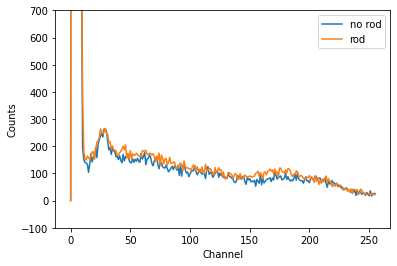

In [ ]:
plt.plot(norod_30deg[:,0], norod_30deg[:,2])
plt.plot(withrod_30deg[:,0],withrod_30deg[:,2]*1226./1449.)
plt.ylim([-100,700])
plt.legend(['no rod','rod'])
plt.xlabel('Channel')
plt.ylabel('Counts')

### Subtract the background (no-rod) scattering for each angle

Text(0, 0.5, 'Counts')

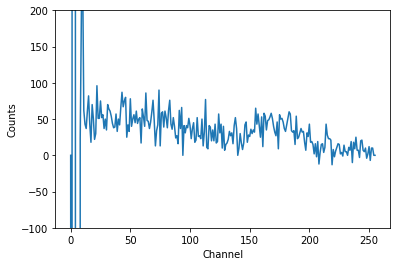

In [ ]:
channel = norod_30deg[:,0] 
sub30 = withrod_30deg[:,2] - norod_30deg[:,2]


plt.plot(channel, sub30)
plt.ylim([-100,200])
plt.xlabel('Channel')
plt.ylabel('Counts')


### Take into account the calibration, which converts channel to energy

note: the number used here is completely made up.  You need to put your own in!

In [ ]:
channel2energy = 121.1;  # keV
energy  = channel*channel2energy
print(energy)

[    0.    121.1   242.2   363.3   484.4   605.5   726.6   847.7   968.8
  1089.9  1211.   1332.1  1453.2  1574.3  1695.4  1816.5  1937.6  2058.7
  2179.8  2300.9  2422.   2543.1  2664.2  2785.3  2906.4  3027.5  3148.6
  3269.7  3390.8  3511.9  3633.   3754.1  3875.2  3996.3  4117.4  4238.5
  4359.6  4480.7  4601.8  4722.9  4844.   4965.1  5086.2  5207.3  5328.4
  5449.5  5570.6  5691.7  5812.8  5933.9  6055.   6176.1  6297.2  6418.3
  6539.4  6660.5  6781.6  6902.7  7023.8  7144.9  7266.   7387.1  7508.2
  7629.3  7750.4  7871.5  7992.6  8113.7  8234.8  8355.9  8477.   8598.1
  8719.2  8840.3  8961.4  9082.5  9203.6  9324.7  9445.8  9566.9  9688.
  9809.1  9930.2 10051.3 10172.4 10293.5 10414.6 10535.7 10656.8 10777.9
 10899.  11020.1 11141.2 11262.3 11383.4 11504.5 11625.6 11746.7 11867.8
 11988.9 12110.  12231.1 12352.2 12473.3 12594.4 12715.5 12836.6 12957.7
 13078.8 13199.9 13321.  13442.1 13563.2 13684.3 13805.4 13926.5 14047.6
 14168.7 14289.8 14410.9 14532.  14653.1 14774.2 148

## Fit the subtracted data
### define the fitting function

In [ ]:
def gaussian(x, mu, sig, A, b):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) / (sig*2*np.pi) - b

### create empty arrays to eventually hold the fitted values and errors (standard deviations)

In [ ]:
GaussianCoeff = np.empty([5,4])
CoefsErr = np.empty([5,4])

### fit all the subtraction data

In [ ]:

init=[175,15,30000,10] # initial parameters to guess for fitting

GaussianCoeffs, cov = curve_fit(gaussian, channel[120:-1], sub30[120:-1],p0=init)  # fitting data with channel number only greater than 120 
CoefsErr = np.sqrt(np.diag(cov)) # find errorbars on the fit values (1 sigma)


print("mean: %3.2f +/- %4.2f, sigma: %4.2f +/- %4.2f, amplitude: %4.2f +/- %4.2f, background: %4.2f +/- %4.2f" % (GaussianCoeffs[0],CoefsErr[0], GaussianCoeffs[1],CoefsErr[1], GaussianCoeffs[2],CoefsErr[2], GaussianCoeffs[3],CoefsErr[3]))


mean: 165.73 +/- 2.06, sigma: 26.98 +/- 3.37, amplitude: 6207.22 +/- 1077.14, background: -6.73 +/- 2.96


## put here all the plots as sub panels

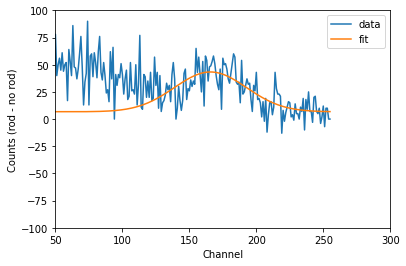

In [ ]:

plt.plot(channel, sub30)
plt.plot(channel,gaussian(channel,GaussianCoeffs[0],GaussianCoeffs[1],GaussianCoeffs[2],GaussianCoeffs[3]))
plt.xlim([50,300])
plt.ylim([-100, 100])
plt.xlabel('Channel')
plt.ylabel('Counts (rod - no rod)')
plt.legend(['data','fit'])


### plot parameters
Here you will want to figure out how to combine information from fits like above for data taken at different angles to show that compton's effect is real.